## K Neighbors Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C35089ED88>,
      dtype=object)

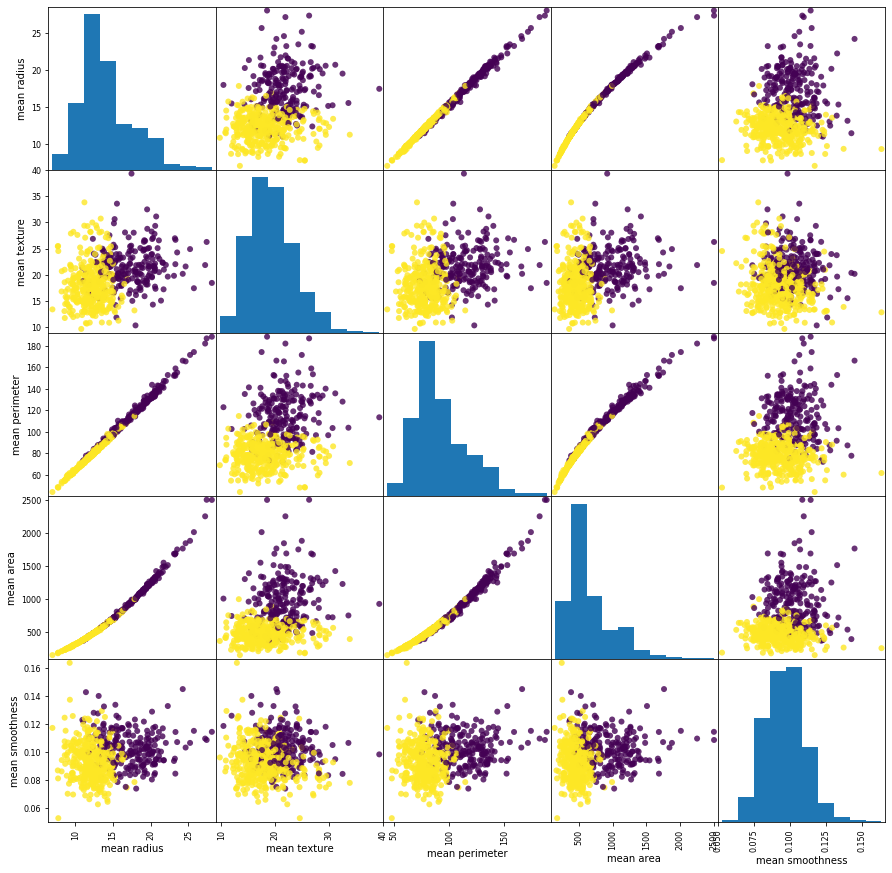

In [2]:
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from pandas.plotting import scatter_matrix

data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

attributes = data.feature_names[:5]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### ``MinMaxScaler``
$$x_{new} = \frac{x - x_{min}}{x_{max}- x_{min}}$$

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [8]:
X_train

array([[0.1452506 , 0.32448133, 0.14249188, ..., 0.22387186, 0.26197516,
        0.14167651],
       [0.18074684, 0.50912863, 0.17275931, ..., 0.25783672, 0.27597083,
        0.14154532],
       [0.43348005, 0.21369295, 0.41814664, ..., 0.38890803, 0.23910901,
        0.09891119],
       ...,
       [0.11619102, 0.35726141, 0.11077327, ..., 0.17402687, 0.17524147,
        0.17263545],
       [0.12963226, 0.35311203, 0.11706171, ..., 0.        , 0.06780997,
        0.06919848],
       [0.21434995, 0.59004149, 0.21235575, ..., 0.33251808, 0.10782574,
        0.21172767]])

In [9]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

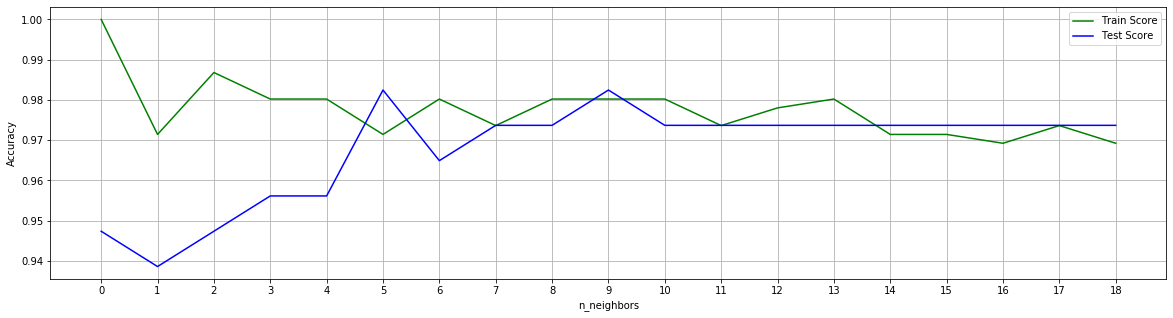

In [10]:
x_axis = range(1,20)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(x_axis, np.arange(20))
plt.grid()
plt.legend()

In [11]:
knn = KNeighborsClassifier(9)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9802
Test score: 0.9737


In [12]:
#!pip install --upgrade mlxtend

In [13]:
print(np.where(X.columns == 'worst area'))
print(np.where(X.columns == 'mean concave points'))

(array([23], dtype=int64),)
(array([7], dtype=int64),)


Text(0, 0.5, 'worst area')

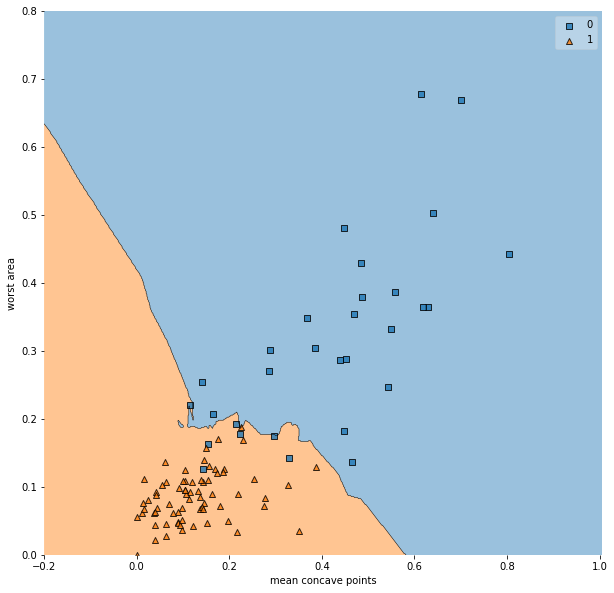

In [14]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(10, 10))
plt.xlim(0, 1)
plt.ylim(0,0.8)
X_b = X_train[:100,[7,23]]
y_b = y_train[:100]

knn = KNeighborsClassifier(9)
knn.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = knn, zoom_factor = 5)
plt.xlabel('mean concave points')
plt.ylabel('worst area')

## K Neighbors Regressor

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3558717C8>,
      dtype=object)

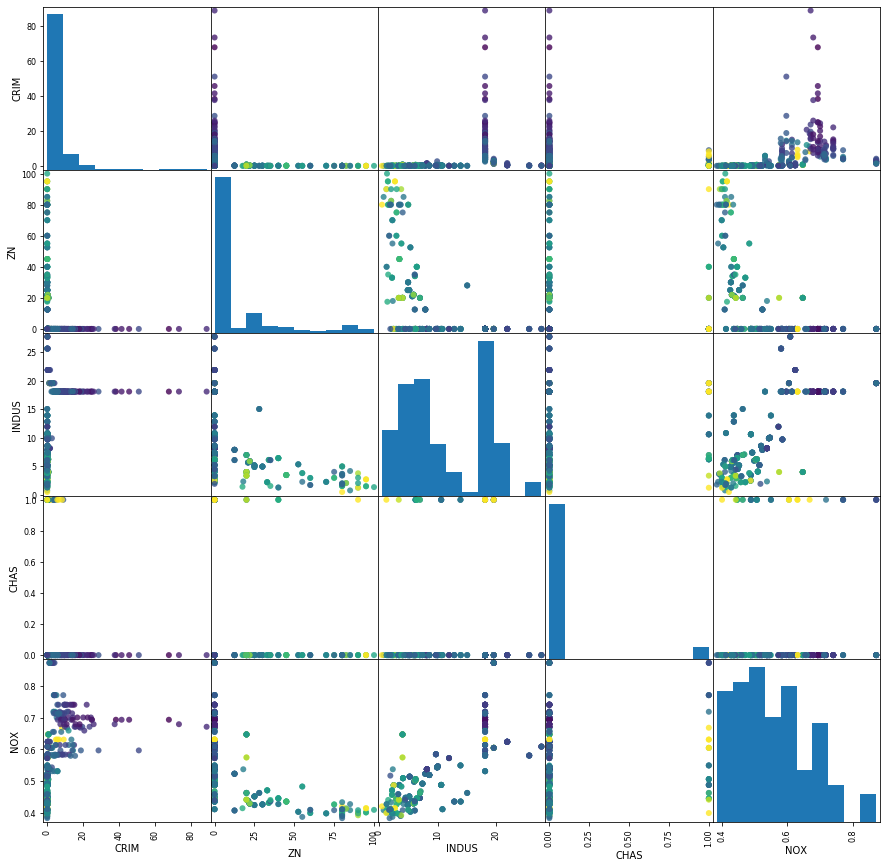

In [15]:
from sklearn.datasets import load_boston
import pandas as pd

data = load_boston()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

attributes = data.feature_names[:5]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

In [16]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Standard Scaler
$$x_{new} = \frac{x - mean}{std}$$

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

Text(0, 0.5, 'MSE')

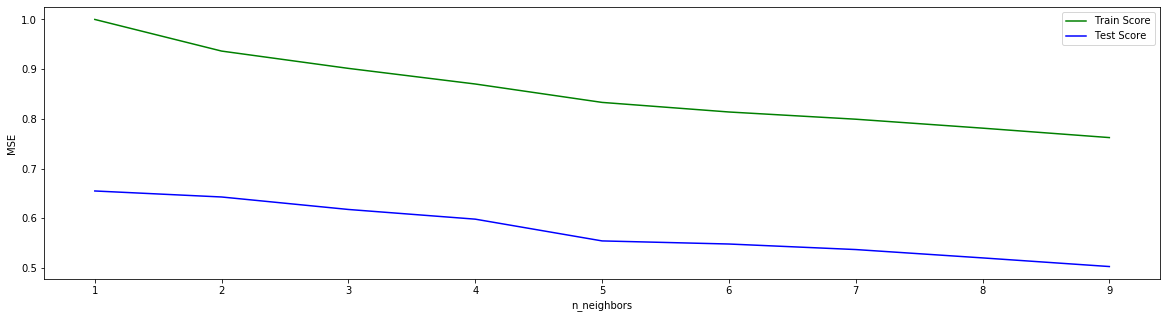

In [18]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('MSE')

In [19]:
np.where(X.columns == 'AGE')

(array([6], dtype=int64),)

Text(0.5, 0, 'AGE')

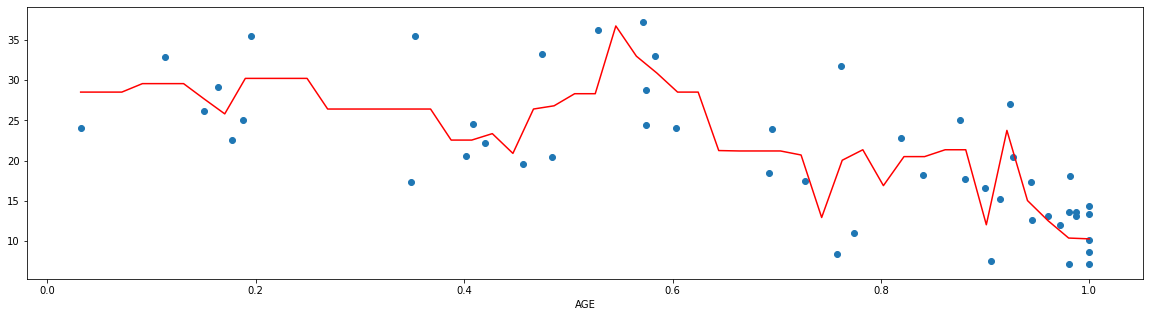

In [20]:
X_b = X_train[:50,6].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(2)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('AGE')

## Linear regression using the Normal Equation

In [21]:
from sklearn.datasets import load_boston
import pandas as pd
data = load_boston()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [23]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.7697699488741149
0.6354638433202127


### r2-score
$$r2 = 1 - \frac{SS_{res}}{SS_{total}}$$
$$SS_{res} = \sum_i (y_i - y_{mean})^2$$
$$SS_{total} = \sum_i (y_i - \hat{y}_i)^2$$
where $y_{mean}$ is the average of all target values, and $\hat{y}_i$ is the prediction of instance $i$. $y_i$ is the actual target value of instance $i$. 

Text(0.5, 0, 'RM')

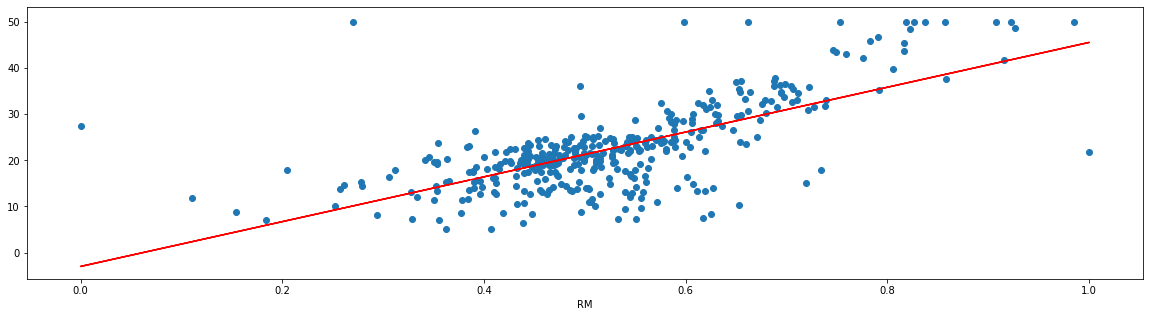

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

## SGD Regressor

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100, learning_rate = 'constant', eta0 = 0.05, shuffle = False)
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

0.7668600359911644
0.6478290962668116


In [26]:
sgd_reg.coef_

array([-10.8575032 ,   4.00351983,  -0.19687207,   3.42572972,
        -6.89545099,  19.69273279,  -0.88743205, -15.28692342,
         5.70921757,  -5.00459715,  -9.71931376,   3.31948073,
       -17.27534717])

In [27]:
sgd_reg.intercept_

array([27.0920546])

In [28]:
sgd_reg.n_iter_

42

## Polynomial regression

In [29]:
np.random.seed(0)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

Text(0, 0.5, '$y$')

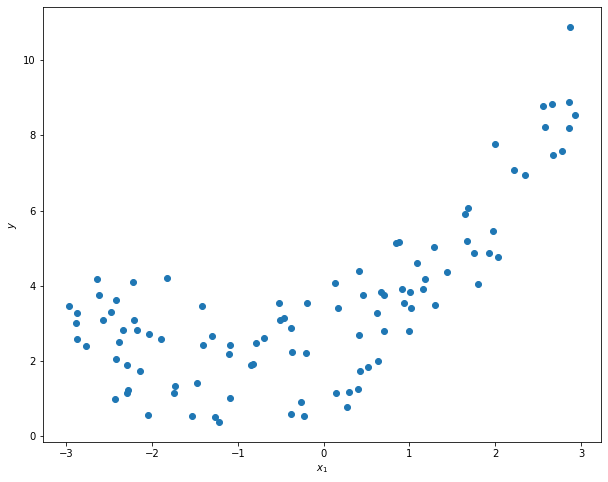

In [30]:
%matplotlib inline

plt.subplots(figsize = (10,8))
plt.scatter(X, y)
plt.xlabel('$x_1$')
plt.ylabel('$y$')

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lreg = LinearRegression()
lreg.fit(X,y)

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

Text(0, 0.5, '$y$')

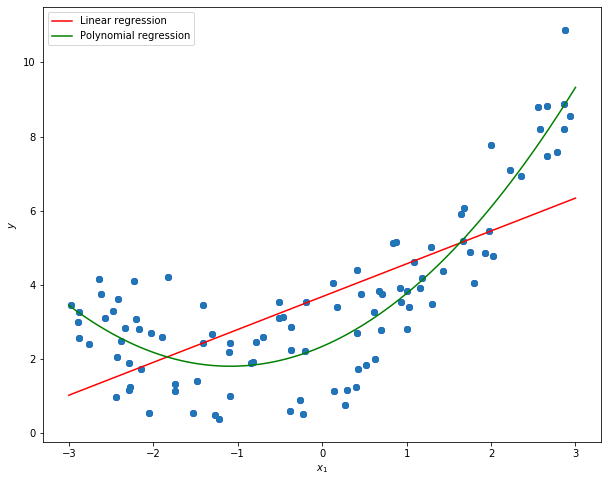

In [32]:
%matplotlib inline

x_axis = np.linspace(-3,3, 100).reshape(-1,1)
plt.subplots(figsize = (10,8))
plt.scatter(X, y, c = 'b')
plt.plot(x_axis, lreg.predict(x_axis), c = 'r', label = 'Linear regression')
plt.plot(x_axis , poly_reg.predict(poly.transform(x_axis)), c = 'g', label = 'Polynomial regression')
plt.scatter(X, y)
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$y$')

In [33]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
data = load_boston()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [34]:
from  sklearn.preprocessing  import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

print(poly_reg.score(X_train_poly, y_train))
print(poly_reg.score(X_test_poly, y_test))

0.952051960903273
0.6074721959665913


In [35]:
np.random.seed(0)
X = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(X) + np.random.normal(0,0.15,len(X))

Text(0, 0.5, '$y$')

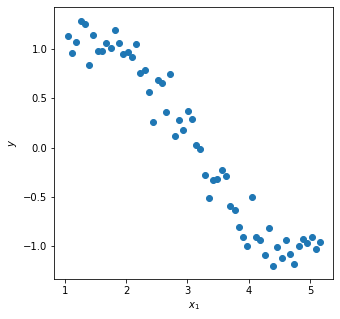

In [36]:
%matplotlib inline

plt.subplots(figsize = (5,5))
plt.scatter(X, y)
plt.xlabel('$x_1$')
plt.ylabel('$y$')

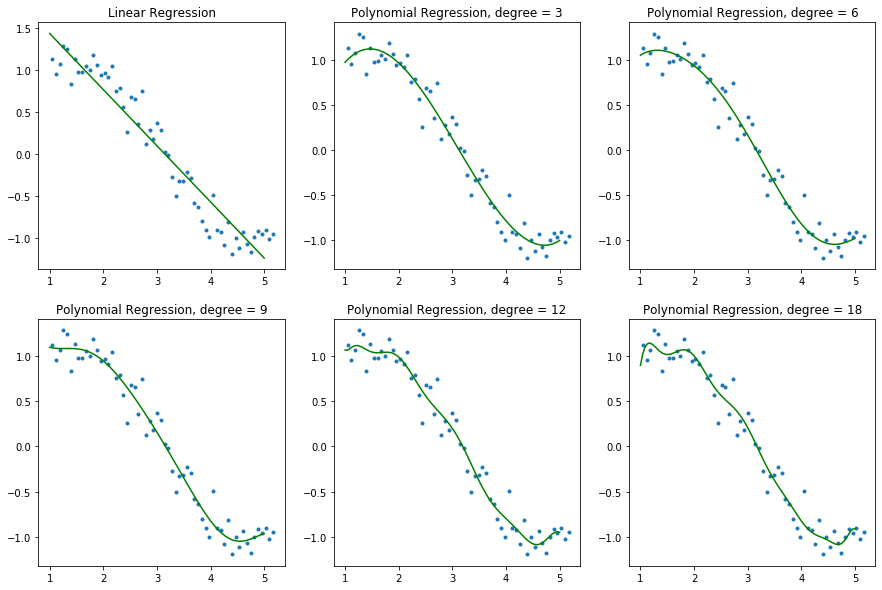

In [37]:
%matplotlib inline

x_values = np.linspace(1,5, 100).reshape(-1,1)

fig, axs = plt.subplots(2, 3, figsize = (15,10)) 
lreg = LinearRegression()
lreg.fit(X.reshape(-1,1),y)
plt.subplot(2, 3, 1)
plt.scatter(X,y, marker = '.')
plt.plot(x_values, lreg.predict(x_values), c = 'g')
plt.title('Linear Regression')

count = 2
for i in [3, 6, 9, 12, 18]:
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X.reshape(-1,1))
    lreg.fit(X_poly, y)
    
    plt.subplot(2, 3, count)
    plt.scatter(X,y, marker = '.')
    plt.plot(x_values, lreg.predict(poly.transform(x_values)), c = 'g')
    plt.title('Polynomial Regression, degree = '+str(i))
    count += 1
    
plt.savefig('polyreg.jpeg')

In [38]:
coef_list = []
intercept_list = []
for i in range(1,15):
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X.reshape(-1,1))
    lreg.fit(X_poly, y)
    coef_list.append(lreg.coef_)
    intercept_list.append(lreg.intercept_)
    

df = pd.DataFrame(coef_list)
df[0] = intercept_list

index_values = ['Linear Regression']
col_names = ['Intercept', 'X_1']
for i in range(2, 15):
    index_values.append('Polynomial Regression - degree '+str(i))
    col_names.append('X_'+str(i))
    
df.index = index_values
df.columns = col_names
df.style.apply(lambda x: ["background: orange" if np.abs(v) > 1000 else "" for v in x], axis = 1)

,Intercept,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14
Linear Regression,2.11197,-0.671468,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 2,2.15608,-0.704931,0.00538559,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 3,-0.617104,2.6418,-1.17952,0.127134,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 4,0.217684,1.26449,-0.40743,-0.0500374,0.0142573,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 5,1.82525,-2.0939,2.1868,-0.984252,0.172593,-0.0101932,nan,nan,nan,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 6,-1.01117,5.07145,-4.88229,2.51883,-0.752613,0.11405,-0.00666536,nan,nan,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 7,7.77705,-20.9585,26.396,-17.3043,6.43176,-1.38139,0.159577,-0.00764445,nan,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 8,7.92323,-21.455,27.0996,-17.8486,6.68389,-1.4532,0.171901,-0.00881309,4.70214e-05,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 9,-0.668473,11.4529,-26.6265,31.2848,-21.1054,8.64975,-2.19479,0.336515,-0.0285001,0.00102099,nan,nan,nan,nan,nan
Polynomial Regression - degree 10,-251.208,1079.47,-2000.39,2115.57,-1415.72,627.491,-186.965,37.061,-4.68782,0.3424,-0.0109885,nan,nan,nan,nan


## Ridge

In [39]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

data = load_boston()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [40]:
from sklearn.linear_model import Ridge

train_score_list = []
test_score_list = []

for alpha in [0.01, 0.1, 1, 10, 100]: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,  y_train)
    train_score_list.append(ridge.score(X_train, y_train))
    test_score_list.append(ridge.score(X_test, y_test))

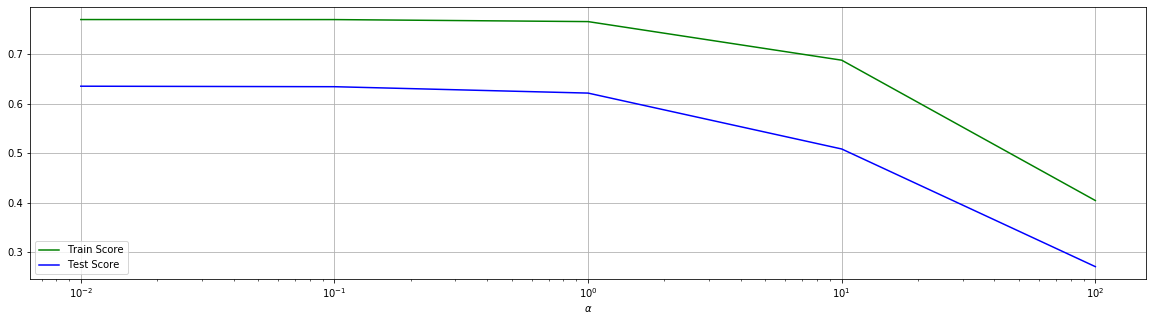

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [42]:
print(train_score_list)
print(test_score_list)

[0.769769247406515, 0.7697040374881804, 0.7656443349364728, 0.6878068494215621, 0.40478438476156353]
[0.635357713788193, 0.634344720438553, 0.6214583227921033, 0.5087226843026418, 0.27142545343695035]


In [43]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.7698
Test score: 0.6354


In [44]:
ridge.coef_

array([-10.41508083,   4.38858811,  -0.16863924,   2.39684771,
        -7.55031338,  19.6491541 ,  -0.68075478, -15.66822277,
         5.4988507 ,  -5.90248847,  -9.26367442,   3.34871439,
       -17.59382327])

In [45]:
ridge.intercept_

27.48622482402449

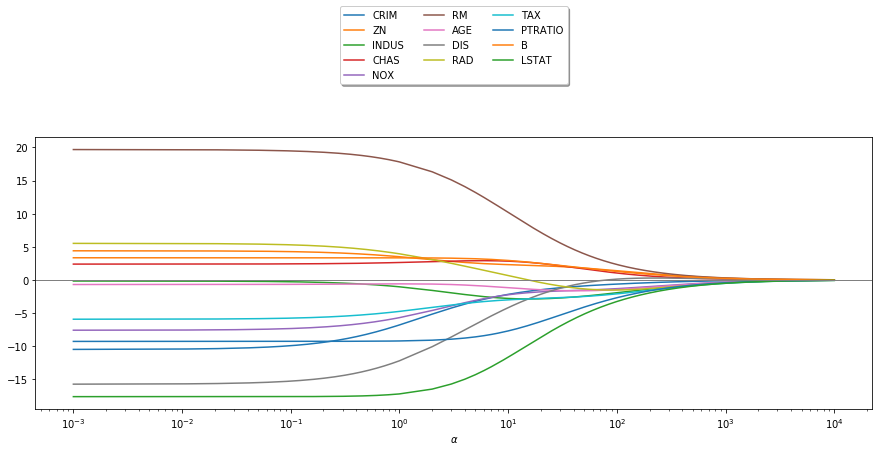

In [46]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### LASSO

In [47]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

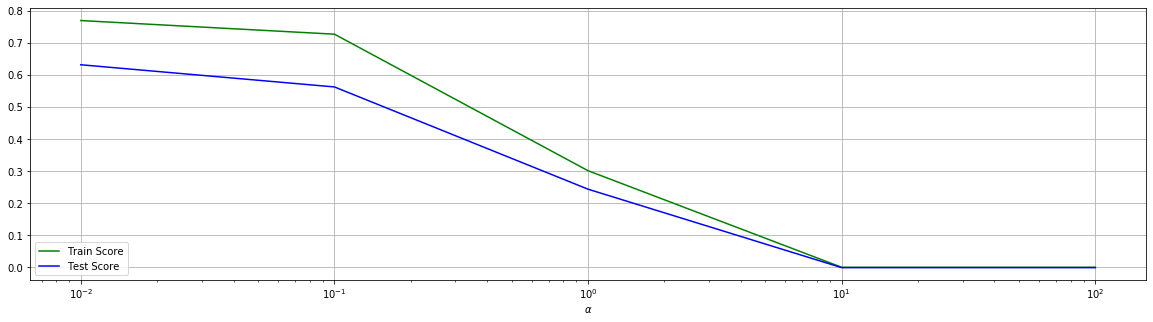

In [48]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

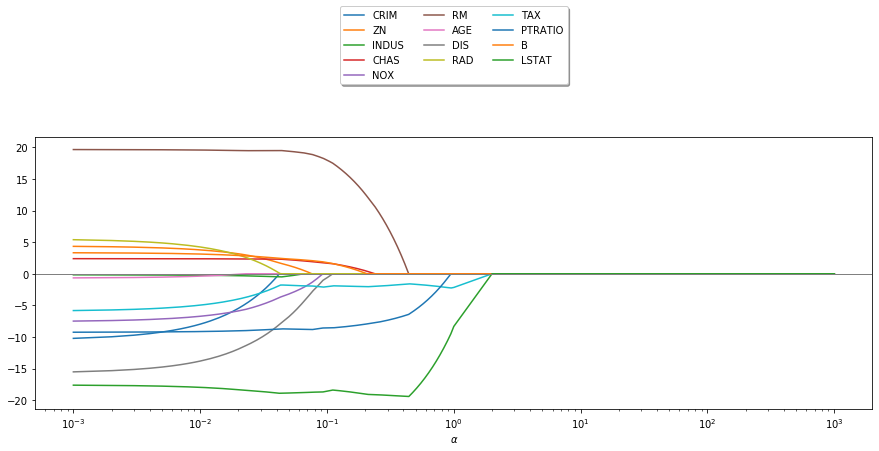

In [49]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [50]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
dict(zip(X.columns, lasso.coef_))

{'CRIM': -0.0,
 'ZN': 0.0,
 'INDUS': -0.0,
 'CHAS': 1.684158748680551,
 'NOX': -0.0,
 'RM': 17.98256733539156,
 'AGE': -0.0,
 'DIS': -0.6299068076501722,
 'RAD': -0.0,
 'TAX': -2.0347874129745347,
 'PTRATIO': -8.573545992060023,
 'B': 1.7797641716229304,
 'LSTAT': -18.587082486804114}

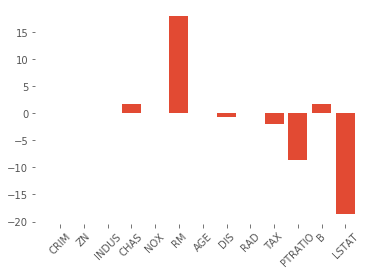

In [51]:
plt.style.use('ggplot')
plt.bar(range(13), lasso.coef_)
plt.box(False)
plt.xticks(range(13), X.columns, rotation = 45)
plt.grid()

## Logistic Regression

In [52]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [54]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [55]:
y.sum()/len(y)

0.6274165202108963

In [56]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

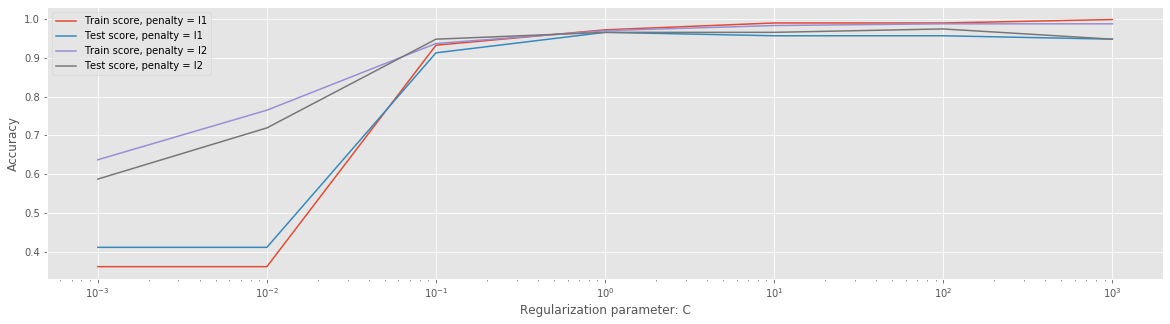

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [58]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

X_b = X_train[200:, [7,23]]
y_b = y_train[200:]

lreg = LogisticRegression(C = 0.1, penalty = 'l2')
lreg.fit(X_b, y_b) 

LogisticRegression(C=0.1)

Text(0, 0.5, 'worst area')

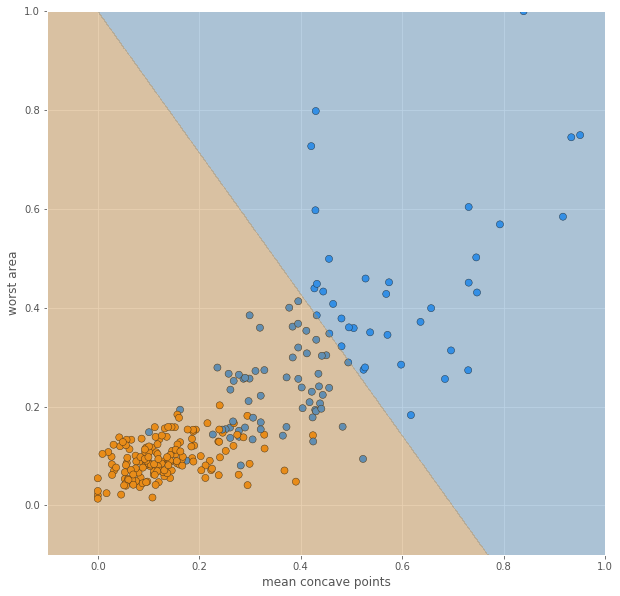

In [59]:
import matplotlib 
import numpy as np

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dodgerblue", "darkorange"])    

plt.subplots(figsize = (10,10))
xaxis = np.linspace(0,1, 100)
plt.scatter(X_b[:,0], X_b[:,1], c = y_b, cmap= cmap, s = 50, edgecolor = 'k')


x1_min, x1_max = X_b[:, 0].min()-1, X_b[:, 0].max() + 1
x2_min, x2_max = X_b[:, 1].min()-1, X_b[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, levels = 1, alpha = 0.4, cmap=cmap)
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)
plt.xlabel('mean concave points')
plt.ylabel('worst area')

Text(0.5, 1.0, 'Logistic Regression with post-preocessing of results')

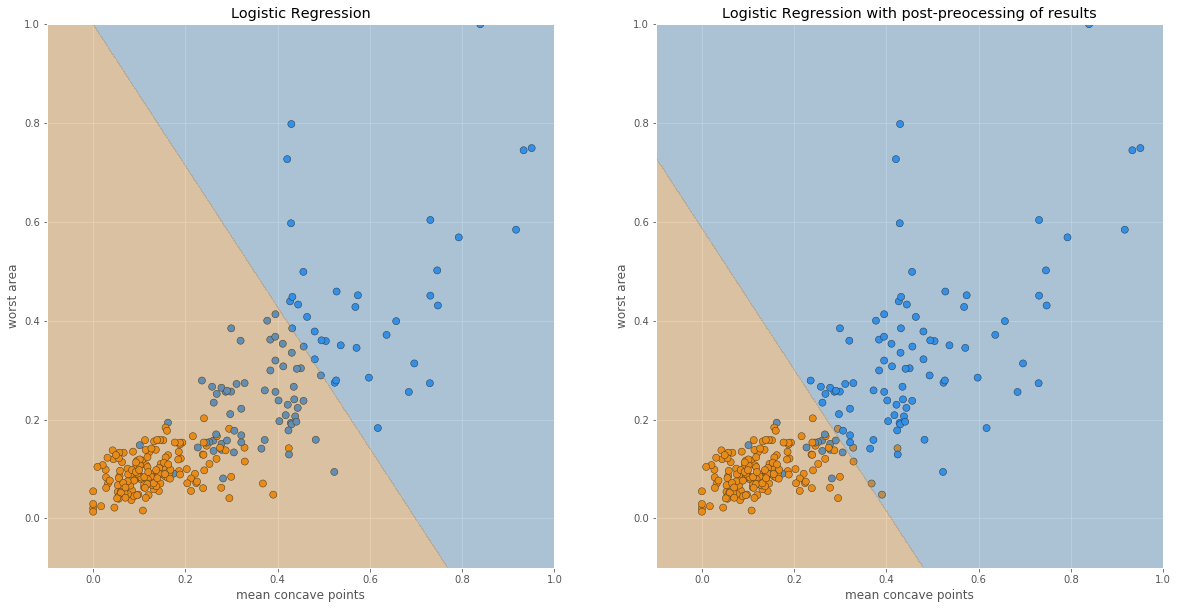

In [60]:
import matplotlib 

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dodgerblue", "darkorange"])    

plt.subplots(figsize = (20,10))
xaxis = np.linspace(0,1, 100)

plt.subplot(1,2,1)
plt.scatter(X_b[:,0], X_b[:,1], c = y_b, cmap= cmap, s = 50, edgecolor = 'k')
x1_min, x1_max = X_b[:, 0].min()-1, X_b[:, 0].max() + 1
x2_min, x2_max = X_b[:, 1].min()-1, X_b[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, levels = 1, alpha = 0.4, cmap=cmap)
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)
plt.xlabel('mean concave points')
plt.ylabel('worst area')
plt.title('Logistic Regression')

plt.subplot(1,2,2)
plt.scatter(X_b[:,0], X_b[:,1], c = y_b, cmap= cmap, s = 50, edgecolor = 'k')
x1_min, x1_max = X_b[:, 0].min()-1, X_b[:, 0].max() + 1
x2_min, x2_max = X_b[:, 1].min()-1, X_b[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict_proba(np.array([xx1.ravel(), xx2.ravel()]).T)[:,1]
Z = Z.reshape(xx1.shape)
Z = np.where(Z <= 0.6, 0, 1)
plt.contourf(xx1, xx2, Z, levels = 1, alpha = 0.4, cmap=cmap)
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)
plt.xlabel('mean concave points')
plt.ylabel('worst area')
plt.title('Logistic Regression with post-preocessing of results')

## Softmax Regression

In [61]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris["data"][:, 2:]  # petal length, petal width
y = iris["target"]

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial')

In [63]:
softmax_reg.predict([[5, 2]])

array([2])

In [64]:
softmax_reg.predict_proba([[5, 2]])

array([[1.33384149e-06, 7.90876321e-02, 9.20911034e-01]])

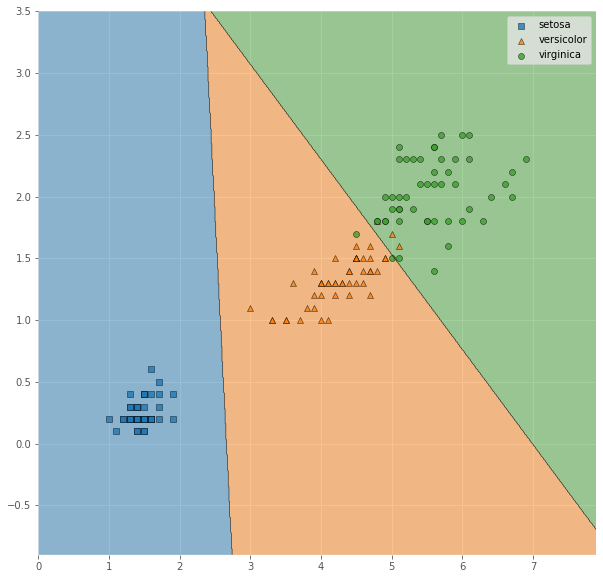

In [65]:
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(figsize = (10,10))
plot_decision_regions(X, y, clf = softmax_reg)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, iris.target_names)

## LinearSVC

In [66]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC

iris = load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

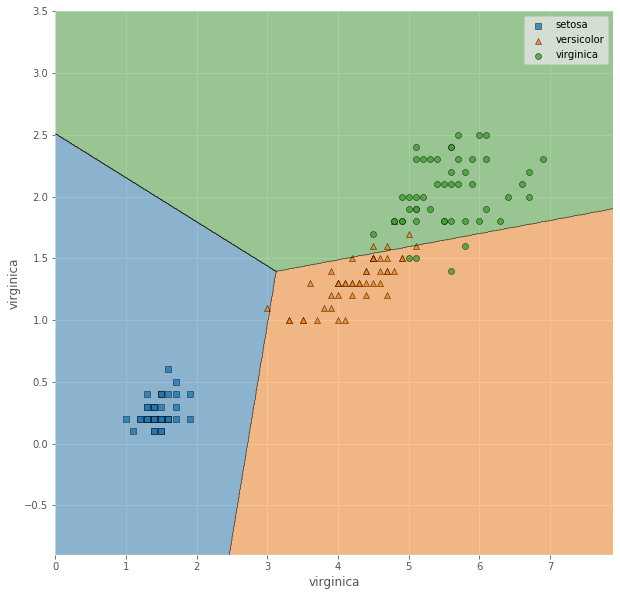

In [67]:
clf = LinearSVC()
clf.fit(X,y)

fig, ax = plt.subplots(figsize = (10,10))
plot_decision_regions(X, y, clf)
plt.xlabel(iris.target_names[2])
plt.ylabel(iris.target_names[2])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, iris.target_names)

## SVC with kernel trick

### ``kernel = 'poly'``

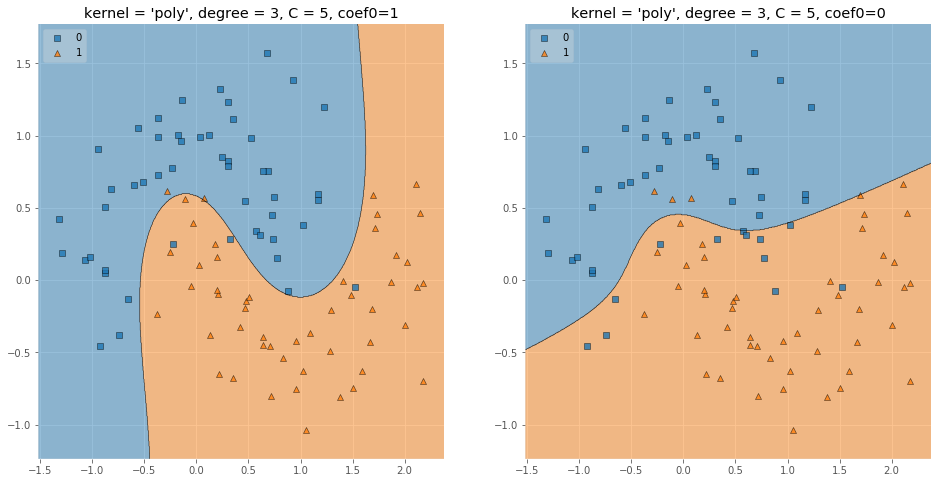

In [68]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 2)

data = make_moons(n_samples= 100, noise = 0.3, random_state = 0)
X = data[0]
y = data[1]

clf1 = SVC(kernel = 'poly', degree = 3, C = 5, coef0=1)
clf1.fit(X,y)

clf2 = SVC(kernel = 'poly', degree = 3, C = 5, coef0=0)
clf2.fit(X,y)

fig = plt.figure(figsize=(16,8))

labels = ["kernel = 'poly', degree = 3, C = 5, coef0=1", "kernel = 'poly', degree = 3, C = 5, coef0=0"]
for clf, lab, grd in zip([clf1, clf2],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2, zoom_factor=5)
    plt.title(lab)

### SVC model with kernel thrick vs. LinearSVC

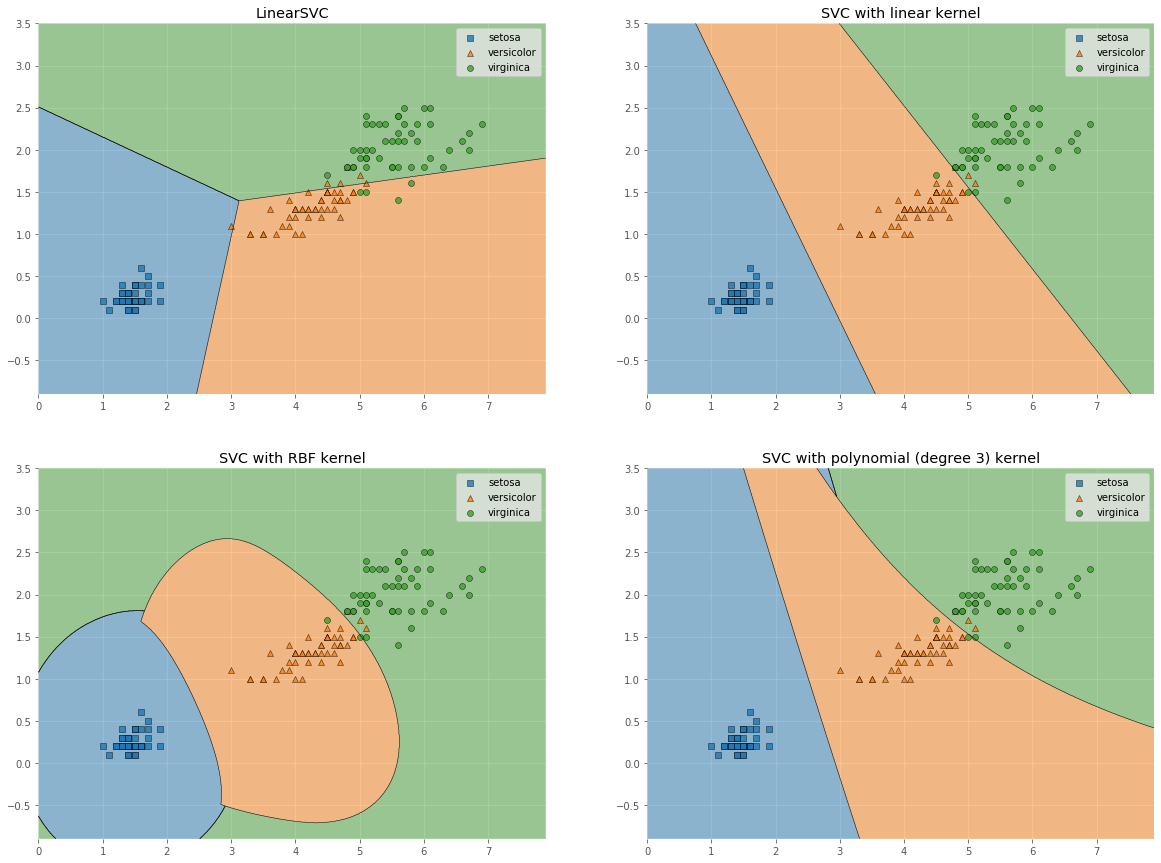

In [69]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
import matplotlib.gridspec as gridspec
import itertools

iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

C = 1
clf1 = LinearSVC(C=C)
clf2 = SVC(kernel='linear', C=C)
clf3 = SVC(kernel='rbf', gamma=0.7, C=C)
clf4 = SVC(kernel='poly', degree=3, C=C)


gs = gridspec.GridSpec(2, 2)
fig, ax = plt.subplots(figsize=(20, 15))

labels = ['LinearSVC',
          'SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, iris.target_names)
    


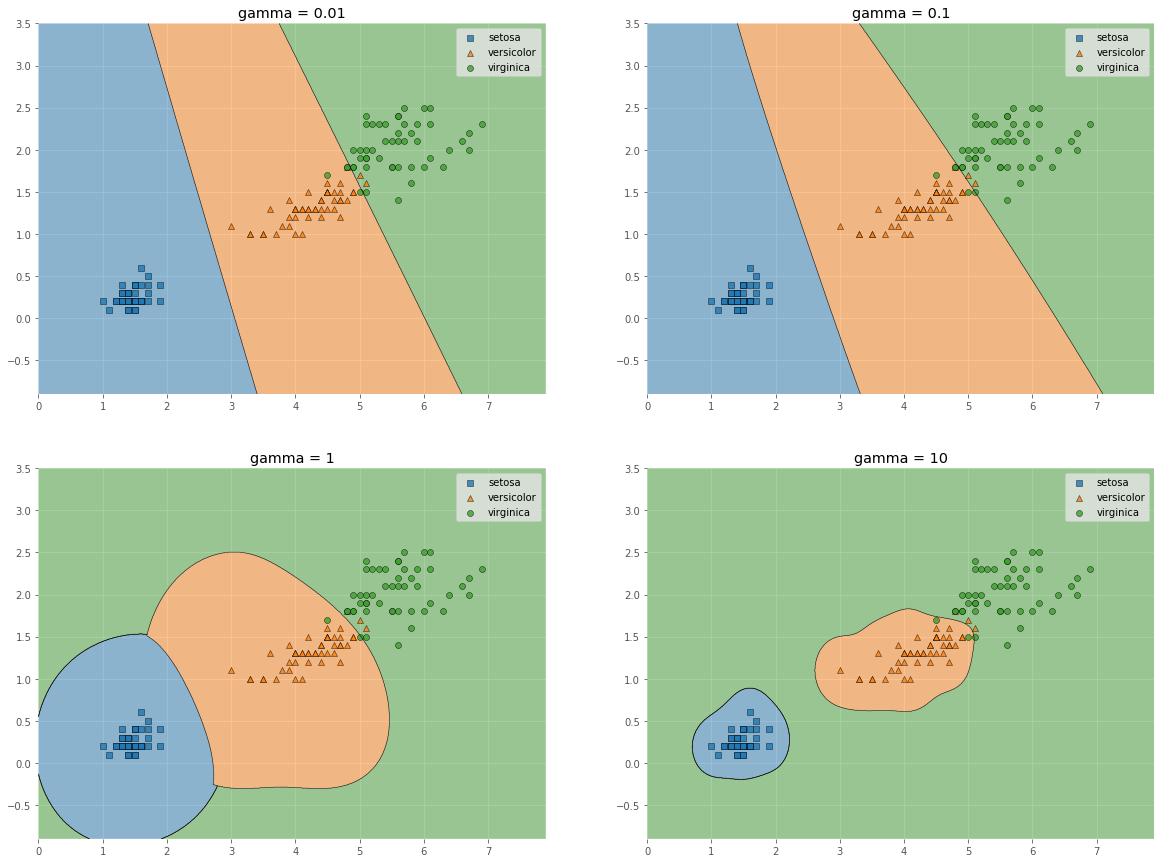

In [70]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


C = 1
clf1 = SVC(kernel='rbf', gamma=0.01, C=C)
clf2 = SVC(kernel='rbf', gamma=0.1, C=C)
clf3 = SVC(kernel='rbf', gamma=1, C=C)
clf4 = SVC(kernel='rbf', gamma=10, C=C)


models = (SVC(kernel='rbf', gamma=0.01, C=1),
         SVC(kernel = 'rbf', gamma = 0.1, C = 1),
         SVC(kernel = 'rbf', gamma = 1, C = 1),
         SVC(kernel = 'rbf', gamma = 10, C = 1))


gs = gridspec.GridSpec(2, 2)
fig, ax = plt.subplots(figsize=(20, 15))

labels = ['gamma = 0.01',
          'gamma = 0.1',
          'gamma = 1',
          'gamma = 10']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, iris.target_names)

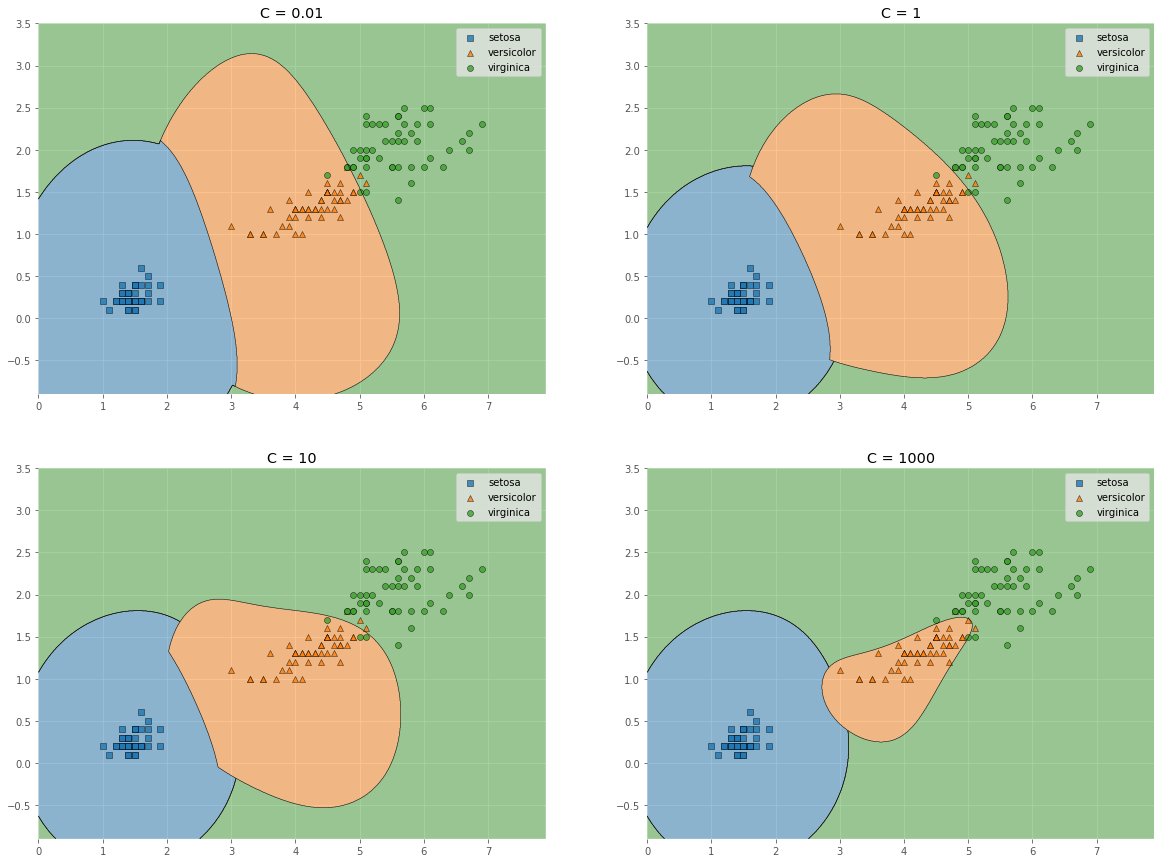

In [71]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


gamma = 0.7
clf1 = SVC(kernel='rbf', gamma=gamma, C=0.01)
clf2 = SVC(kernel='rbf', gamma=gamma, C=1)
clf3 = SVC(kernel='rbf', gamma=gamma, C=10)
clf4 = SVC(kernel='rbf', gamma=gamma, C=1000)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20, 15))

labels = ['C = 0.01',
          'C = 1',
          'C = 10',
          'C = 1000']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, iris.target_names)

## Decision Tree

In [72]:
Xarray = np.array([['Rainy', 'Hot', 'High', 'False'],
             ['Rainy', 'Hot', 'High', 'True'],
             ['Overcast', 'Hot', 'High', 'False'],
             ['Sunny', 'Mild', 'High', 'False'],
             ['Sunny', 'Cool', 'Normal', 'False'],
             ['Sunny', 'Cool', 'Normal', 'False'],
             ['Overcast', 'Cool', 'Normal', 'True'],
             ['Rainy', 'Mild', 'High', 'False'],
             ['Rainy', 'Cool', 'Normal', 'False'], 
             ['Sunny', 'Mild', 'Normal', 'False'], 
             ['Rainy', 'Mild', 'Normal', 'True'], 
             ['Overcast', 'Mild', 'High', 'True'], 
             ['Overcast', 'Hot', 'Normal', 'False'], 
             ['Sunny', 'Mild', 'High', 'True']])

X = pd.DataFrame(Xarray, columns = ['Outlook', 'Temp', 'Humidity', 'Windy'])

y = np.array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'])

In [73]:
X

,Outlook,Temp,Humidity,Windy
0,Rainy,Hot,High,False
1,Rainy,Hot,High,True
2,Overcast,Hot,High,False
3,Sunny,Mild,High,False
4,Sunny,Cool,Normal,False
5,Sunny,Cool,Normal,False
6,Overcast,Cool,Normal,True
7,Rainy,Mild,High,False
8,Rainy,Cool,Normal,False
9,Sunny,Mild,Normal,False


In [74]:
X['Outlook'] = X['Outlook'].map({'Rainy': 0, 'Sunny': 1, 'Overcast': 2}).astype(int)

In [75]:
X['Temp'] = X['Temp'].map({'Hot':0, 'Mild': 1, 'Cool':2})

In [76]:
X['Humidity'] = X['Humidity'].map({'High': 0, 'Normal': 1}).astype(int)

In [77]:
X['Windy'] = X['Windy'].map({'False': 1, 'True': 0}).astype(int)
X

,Outlook,Temp,Humidity,Windy
0,0,0,0,1
1,0,0,0,0
2,2,0,0,1
3,1,1,0,1
4,1,2,1,1
5,1,2,1,1
6,2,2,1,0
7,0,1,0,1
8,0,2,1,1
9,1,1,1,1


In [78]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion= 'entropy')
tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

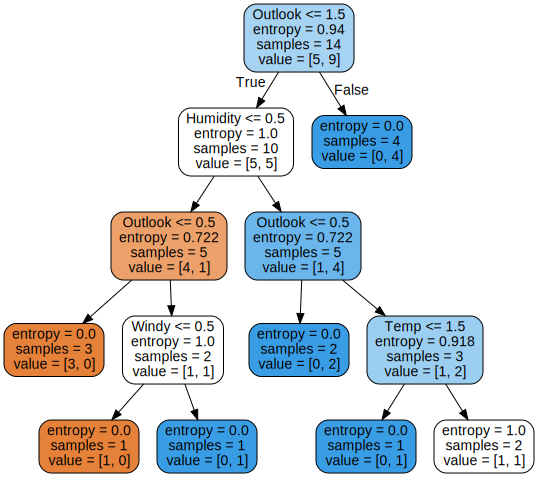

In [79]:
import os 
import graphviz

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Create DOT data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, feature_names=X.columns) 

# Draw graph
graph = graphviz.Source(dot_data) 

# Show graph
graph 

In [80]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.881


In [81]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.902


In [82]:
import matplotlib.pyplot as plt
import numpy as np

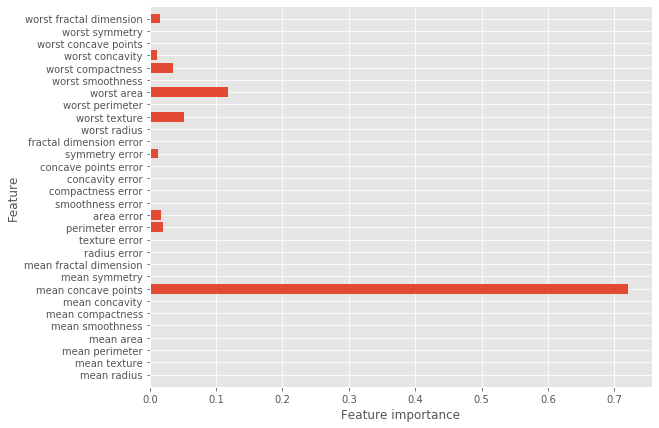

In [83]:
%matplotlib inline

def plot_feature_importances_cancer(model):
    fig, ax = plt.subplots(figsize=(9, 7))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(dtree)

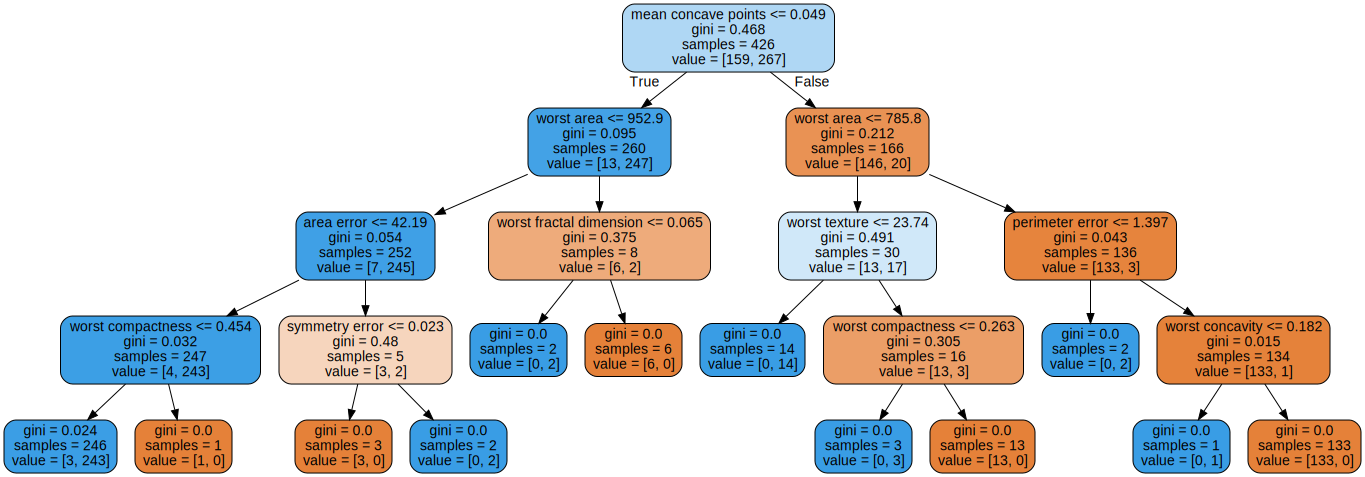

In [84]:
import os 
import graphviz

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Create DOT data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtree, out_file=None, filled=True, rounded=True, feature_names=cancer.feature_names) 

# Draw graph
graph = graphviz.Source(dot_data) 

# Show graph
graph 

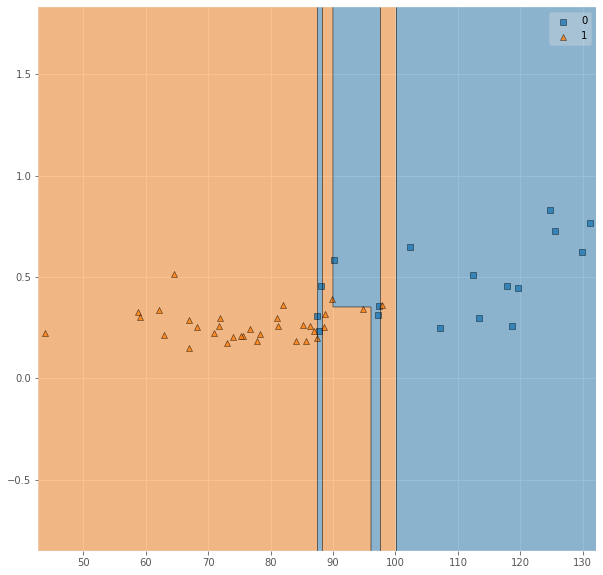

In [85]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

X_b =  X_train[:50,[2,10]]
y_b = y_train[:50]

plt.subplots(figsize = (10,10))
dtree = DecisionTreeClassifier()
dtree.fit(X_b, y_b)

plot_decision_regions(X_b, y_b, clf = dtree)

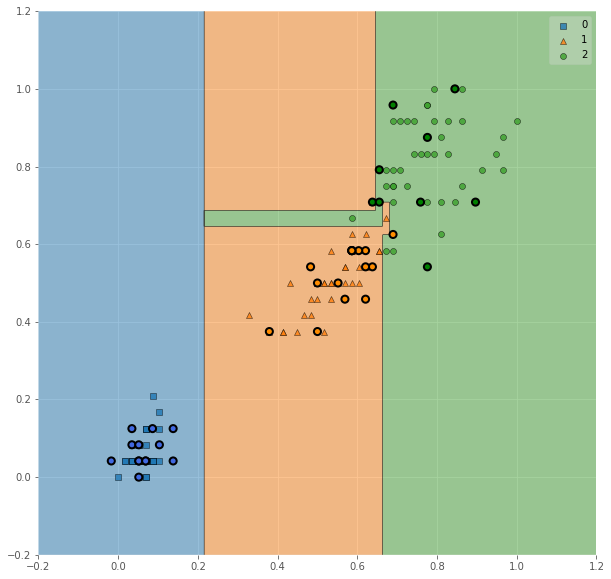

In [86]:
from mlxtend.plotting import plot_decision_regions, category_scatter
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib

data = load_iris()

X = data.data[:,2:]
y = data.target

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

plt.subplots(figsize = (10,10))
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf = dtree, zoom_factor=5)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["royalblue", "darkorange", "green"])
plt.scatter(X_test[:,0], X_test[:,1], c = y_test, cmap = cmap, facecolor = "none", edgecolor = 'k', linewidth = 2, s = 50)

## Decision Tree Regressor

In [87]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

boston = load_boston()
X = boston.data
y = boston.target

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

Text(0.5, 0, 'AGE')

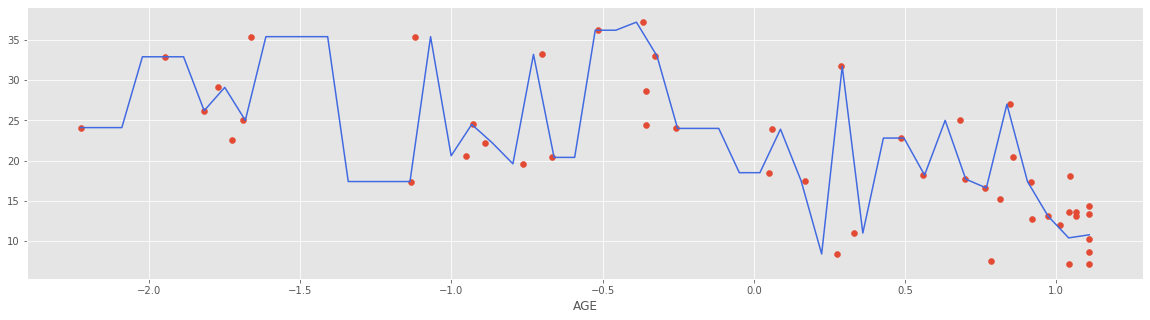

In [88]:
from sklearn.datasets import load_boston
import pandas as pd

data = load_boston()

X_b = X_train[:50,6].reshape(-1,1)
y_b = y_train[:50]

clf = DecisionTreeRegressor()
clf.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = clf.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'royalblue')
plt.scatter(X_b, y_b)
plt.xlabel('AGE')

Text(0.5, 0, 'AGE')

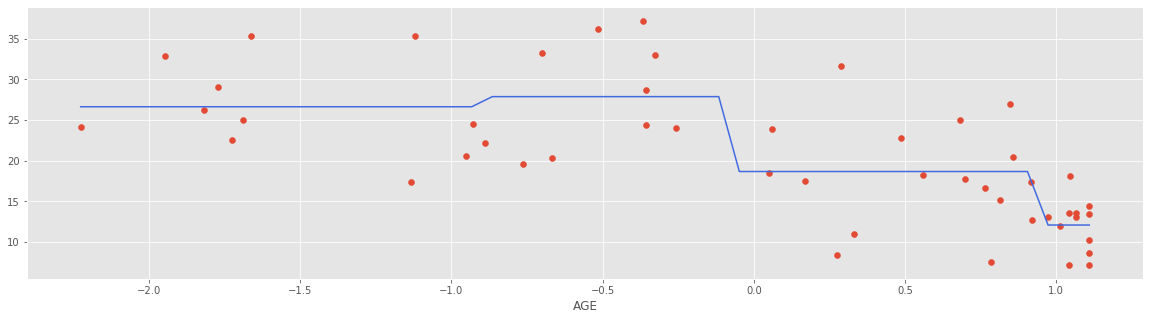

In [89]:
from sklearn.datasets import load_boston
import pandas as pd

data = load_boston()

X_b = X_train[:50,6].reshape(-1,1)
y_b = y_train[:50]

clf = DecisionTreeRegressor(min_samples_leaf=10)
clf.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = clf.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'royalblue')
plt.scatter(X_b, y_b)
plt.xlabel('AGE')